# Introduction on dynamical systems with $\dot{x}=sin(x)$

## System of order 1. Flows on the line. A geometric way to think.

This autonomous equation is in fact difficult to solve analytically... Before simulating it numerically, without thinking too much, we can be smart and think "geometrically"

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from scipy.integrate import odeint

from scipy.signal import argrelextrema # local extremas of an array

%matplotlib inline

What we can do is to solve the dynamical system numerically and obtain the trajectory for one given initial condition (let's say $x(0)=0.1$). We can compare it to the analytical trajectory that is known in this simple dynamical system.

<img  src="Figures_subject/Flows_on_the_line_trajectory.png"  width="700" />

#### 1. Graph 1

<ipython-input-2-1dcf9af361ff>:28: RuntimeWarning: divide by zero encountered in true_divide
  t  = np.log(np.abs(1/np.sin(x0) + 1/np.tan(x0))) - np.log(np.abs(1/np.sin(x) + 1/np.tan(x)))
<ipython-input-2-1dcf9af361ff>:28: RuntimeWarning: divide by zero encountered in log
  t  = np.log(np.abs(1/np.sin(x0) + 1/np.tan(x0))) - np.log(np.abs(1/np.sin(x) + 1/np.tan(x)))


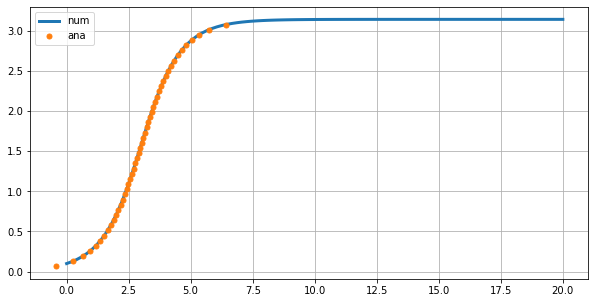

In [2]:
plt.figure(figsize=(10,5))

# data
x0 = .1

# Numerical  # help(odeint)

def function(x, t):
    
    """ Function returning the 
    interpolation function with 
    odeint. 
    """
    
    return np.sin(x)

t   = np.linspace(0, 20, 100)
sol = odeint(function, x0, t)

plt.plot(t, sol, '-', lw=3, label='num')

# ------------

# Analytical

x  = np.linspace(0, np.pi, 50)

t  = np.log(np.abs(1/np.sin(x0) + 1/np.tan(x0))) - np.log(np.abs(1/np.sin(x) + 1/np.tan(x)))

plt.plot(t, x, '.', label='ana', markersize=10)

plt.grid(True)
plt.legend()

**Not quiet the same curve as we don't reach extremum behaviors $x\rightarrow 0,\pi$ for analytical graph.**

Or we can plot the velocity of the state variable by deriving the solution numerically with a forward difference:
<img  src="Figures_subject/Flows_on_the_line_velocity.png"  width="600" />

#### 2. Forward derivative

In [3]:
def derivative_x(sol, x):
    
    """ Function returning the derivative 
    provided solution function. 
    """
    
    dx    = (x[-1] - x[0]) / len(x)
    der_x = np.zeros_like(sol)
    der_x[:-1] = (sol[1:] - sol[:-1]) / dx

    return der_x

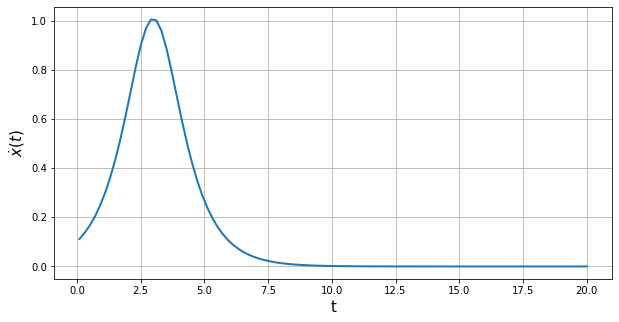

In [4]:
t     = np.linspace(x0, 20, 100)
sol   = odeint(function, x0, t)
der_x = derivative_x(sol, t)

plt.figure(figsize=(10,5))

plt.plot(t, der_x, lw=2)

plt.xlabel('t', size=15)
plt.ylabel(r'$\dot{x}(t)$', size=15)

plt.grid(True)

**Must correct the fact we should have max(x')=1.**

### Phase portrait, trajectory and fixed points.

We can also plot that same trajectory in the phase space $\dot{x} = f(x)$. The analytical phase portrait is straightforward. One trajectroy should exactly follow that phase portrait:
<img  src="Figures_subject/Flows_on_the_line_phase_space.png"  width="600" />

#### 3. Phase portrait

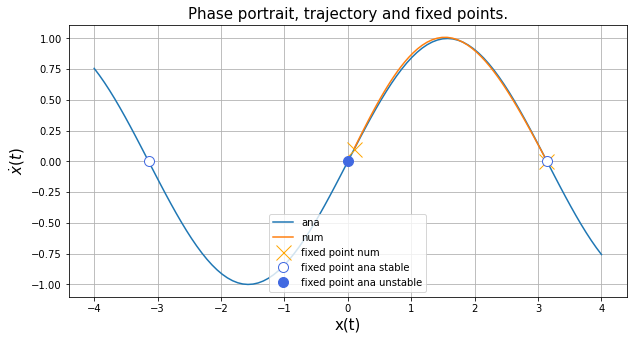

In [5]:
plt.figure(figsize=(10,5))

x     = np.linspace(-4, +4, 100)
sol   = odeint(function, x0, x)
der_x = derivative_x(sol, x)

# x_dot = f(x)
plt.plot(  x, np.sin(x),      label='ana')
plt.plot(sol,     der_x, '-', label='num')

# ------
# f(x_star) = 0

idx = np.r_[True, der_x[1:,0] < der_x[:-1,0]] & np.r_[der_x[:-1,0] < der_x[1:,0], True] # where we have a local min

plt.plot(      sol[idx]  , der_x[idx], 'x', color='orange'   , markersize=15, label='fixed point num')
plt.plot([-np.pi, +np.pi],   [0, 0]  , 'o', color='royalblue', markersize=10, label='fixed point ana stable', markerfacecolor="white") #stable fixed points
plt.plot(         0      ,      0    , 'o', color='royalblue', markersize=10, label='fixed point ana unstable') #unstable fixed point

plt.title('Phase portrait, trajectory and fixed points.', size=15)
plt.xlabel('x(t)', size=15)
plt.ylabel(r'$\dot{x}(t)$', size=15)

plt.grid(True)
plt.legend(loc=8)

### The sum of many trajectories starting at $x_0$ constitute the phase portrait

If we plot many trajectories with different initial conditions in the phase space, we can draw the phase portrait of the dynamical system. Stable fixed points attract the trajectories, unstable fixed points repell the trajectories. The phase portrait of trajectories draw a sine function here:
<img  src="Figures_subject/Flows_on_the_line_phase_portrait.png"  width="600" />

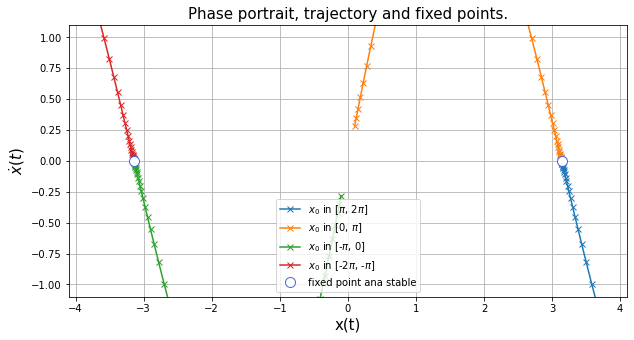

In [6]:
plt.figure(figsize=(10,5))

Nt    = 50
t     = np.linspace(0, 10, Nt)

eps   = 1.E-1

# Far Right - x0 in [pi, 2.pi]

x0    = 2*np.pi - eps

sol   = odeint(function, x0, t)
der_x = derivative_x(sol, x)

plt.plot(sol, der_x, 'x-', label=r'$x_0$ in [$\pi$, 2$\pi$]')

# ------------

# Right - x0 in [0, pi]

x0    = +eps

sol   = odeint(function, x0, t)
der_x = derivative_x(sol, x)

plt.plot(sol, der_x, 'x-', label=r'$x_0$ in [0, $\pi$]')

# ------------------------
# ------------------------

# Left - x0 in [-pi, 0]

x0    = -eps

sol   = odeint(function, x0, t)
der_x = derivative_x(sol, x)

plt.plot(sol, der_x, 'x-', label=r'$x_0$ in [-$\pi$, 0]')

# -------------

# Far Left - x0 in [-2.pi, -pi]

x0    = -2*np.pi + eps

sol   = odeint(function, x0, t)
der_x = derivative_x(sol, x)

plt.plot(sol, der_x, 'x-', label=r'$x_0$ in [-2$\pi$, -$\pi$]')

# -------------
# f(x_star) = 0

plt.plot([-np.pi, +np.pi], [0, 0], 'o', color='royalblue', markersize=10, label='fixed point ana stable', markerfacecolor="white") #stable fixed points

plt.title('Phase portrait, trajectory and fixed points.', size=15)
plt.xlabel('x(t)', size=15)
plt.ylabel(r'$\dot{x}(t)$', size=15)

plt.axis((-4 -.1, +4 +.1, -1 -.1, 1 +.1))

plt.grid(True)
plt.legend(loc=8)

Note on results consistency :
* for $x=0$ we indeed get a fixed point (not displayed here but tested) ;
* for a $x_0$ point in a range, no matter what x one chooses, it doesn't influence real range (works kinda like x is a vector of time directly and that the bigger x, in fact the bigger t and so the more we converge to fixed point) ;
* the nb of points influences much for the shape of $\dot{x}(t)$ ;

* understand that the closest $x_0$ from an attractive fixed point, the lower the slope and so the more time x value takes to increase. Therefore, one should add more point to trace graph in aimed range.

Another option is to consider multiple initial condition as graphs will then superpose. It probably saves some calculation time.

## Linear stability analysis

Linear stability analysis can be done by linearizing the dynamical system $\dot{x}=f(x)$ around fixed points. Let $\eta(t)=x(t)-x^{\ast}$ be a small perturbation away from the considered fixed point $x^{\ast}$. To see whether the perturbation grows or decays, we derive a differential equation for $\eta$. Differentiation yields

$$\dot{\eta}=\frac{d}{dt}(x(t)-x^{\ast})=\dot{x}$$

since $x^{\ast}$ is constant. Thus $\dot{\eta}=f(x)=f(x+\eta)$. Now using Taylor's expansion we obtain

$$f(x^{\ast}+\eta)=f(x^{\ast}) + f'(x^{\ast})\eta+O(\eta^2)$$

where $O(\eta^2)$ denotes quadratically small terms in $\eta$. Finally note that $f(x^{\ast})=0$, since $x^{\ast}$ is a fixed point, so that $\dot{\eta}=\eta f'(x^{\ast})+O(\eta^2)$. Now if $f'(x^{\ast}) \neq 0$, the $O(\eta^2)$ terms are negligible and we may write the approximation

$$\dot{\eta}=\eta f'(x^{\ast}).$$

This is a linear equation in $\eta$ and is called a linearization about $x^{\ast}$. This equation is easy to solve. It shows directly that the perturbation $\eta(t)$ grows exponentially if $f'(x^{\ast})>0$ (the fixed point is linearly unstable) and decays if $f'(x^{\ast})<0$ (the fixed point is linearly asymptotically stable). If $f'(x^{\ast})=0$, the $O(\eta^2)$ terms are not negligible and a nonlinear analyisis is needed to determine stability.



In our example $\dot{x}=sin(x)$, the linearized dynamical system governing the perturbation $\eta(t)$ about the fixed point $x^{\ast}=$ reads

$$\dot{\eta}=cos(x^{\ast})\eta$$

whose solution is simply $\eta(t)=\eta(0)e^{(\cos(x^{\ast})t)}$.The solution $x(t)$ can then be approximated by $x(t)=x^{\ast}+\eta(t)$ about $x^{\ast}$. Below, is the nonlinear and linear response around $\pi$ (initial condition starting at $\pi/2$).

<img  src="Figures_subject/Linear_analysis_around_xast_ega_pi.png"  width="600"/>

In [7]:
def function_non_linear(x, t):
    
    """ Function returning order 5 non-linear
    equation for f(eta + x_star) with x_star=pi.
    """
    
    x_star = np.pi
    
    return x**3 / 6 - x
#     return -(x-x_star) + (x-x_star)**3 / 6  # order 4 precision

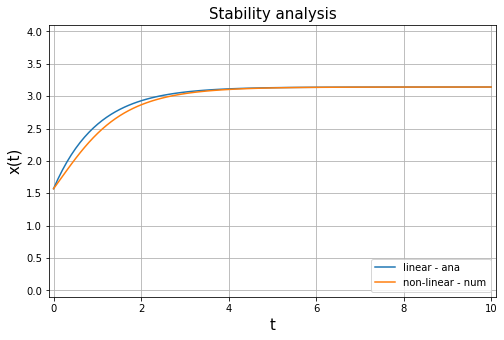

In [8]:
# Data
x0     = np.pi/2 #start from x_0
x_star = np.pi   #check that from this point, x_star is a stable fixed point
eta_0  = x0 - x_star

# Analytical solution
t      = np.linspace(0, 10, 100) 
eta    = eta_0 * np.exp(np.cos(x_star)*t) #order 2 as sin(pi)=0
x      = x_star + eta

# Numerical solution
# x_sol  = np.linspace(x_0, x_star, 100)
t_sol  = np.linspace(0, 10, 100)
sol    = odeint(function_non_linear, eta_0, t_sol) #eta_dot = f(eta)

# ------

plt.figure(figsize=(8, 5))

plt.plot(t    , x  , label='linear - ana')
plt.plot(t_sol, sol+x_star, label='non-linear - num')

plt.title('Stability analysis', size=15)
plt.xlabel('t', size=15)
plt.ylabel('x(t)', size=15)

eps = .1
plt.axis((0 -eps, 10 +eps, 0 -eps, 4 +eps))

plt.grid(True)
plt.legend(loc=4)

## Potential Energy

We can view the dynamical system $\dot{x}=f(x)$ where the forces $f(x)$ eventually derive from a potential such that ${f(x) = -\frac{dV}{dx}}$ where $V(x)$ is the potential energy of the system. Here, we have simply $V(x)=cos(x)$. The fixed points verify then simply $\frac{dV}{dx}=f(x)=0$.

The first order or linearized approach of potential energy around equilibrium or fixed points requires a Taylor expansion of $V(x)$ at a given $x^{\ast}$ so that
$$V_{lin}(x)=V(x^{\ast}) + \frac{V'(x^{\ast})}{1!}(x-x^{\ast}) + \frac{V''(x^{\ast})}{2!}(x-x^{\ast})^2+...$$
which means in $x^{\ast}=0$, $V_{lin}(x)=1-\frac{1}{2}x^2$,

in $x^{\ast}=-\pi$, $V_{lin}(x)=-1+\frac{1}{2}(x+\pi)^2$,

in $x^{\ast}=\pi$, $V_{lin}(x)=-1+\frac{1}{2}(x-\pi)^2$


<img  src="Figures_subject/Potential_energy.png" width="600" />

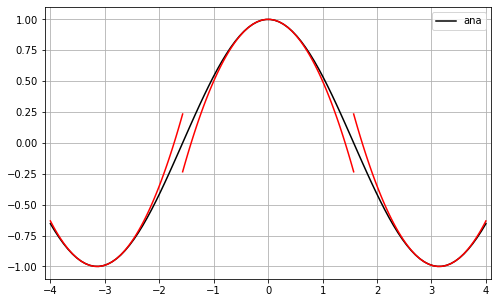

In [9]:
x = np.linspace(-4, +4, 100)

# Analytic second order linearization
x_1 = np.linspace(-4, -np.pi/2, 100)
x_2 = np.linspace(-np.pi/2, +np.pi/2, 100)
x_3 = np.linspace(np.pi/2, +4, 100)

V_1 = -1 + .5 * (x_1 + np.pi)**2
V_2 =  1 - .5 *  x_2**2
V_3 = -1 + .5 * (x_3 - np.pi)**2

plt.figure(figsize=(8, 5))

plt.plot(x, np.cos(x), 'k-', label='ana')

plt.plot(x_1, V_1, 'r')
plt.plot(x_2, V_2, 'r')
plt.plot(x_3, V_3, 'r')

plt.axis((-4 -.1, +4 +.1, -1 -.1, +1 +.1)) 

plt.grid(True)
plt.legend()

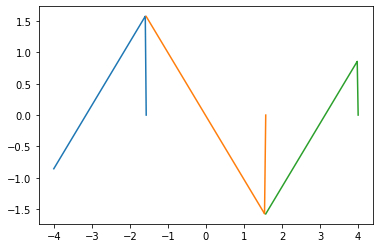

In [10]:
der_V_1 = derivative_x(V_1, x_1)
der_V_2 = derivative_x(V_2, x_2)
der_V_3 = derivative_x(V_3, x_3)

plt.plot(x_1, der_V_1)
plt.plot(x_2, der_V_2)
plt.plot(x_3, der_V_3)